### IRIS DATA SETİNİN KARAR AĞACI İLE SINIFLANDIRILMASI

İris veri seti, iris çiçeğinin taç (petal) ve çanak yaprağının (sepal) boyutlarına göre çeşitli sınıflara ayrılmış tablosunun dosya biçimi şeklinde saklanmasıdır.Amacımız ise bilinmeyen bir boyutlardaki iris çiçeğinin makine öğrenmesi yoluyla hangi sınıfa ait olduğunu belirlemektir.   
Her bir satır, bir çiçeğe ait ölçüm değerlerini gösterir. Özellikler sırasıyla sepal-length (alt yaprak uzunluğu cm), sepal-with (alt yaprak genişliği cm), pedal-length (üst yaprak genişliği), pedal-width (üst yaprak uzunluğu).     
Boyutlara göre ayırmaya göre üç adet farklı sınıf vardır.Sınıflarımız setosa, versicolor ve virginica'dır.  
#### Problemde eğitim setimizdeki yaprak uzunluk ve genişliklerini kullanarak öğreniyoruz ve bunun karşılığında yeni kaydın üç adet sınıftan hangisine ait olduğunu tahmin ediyoruz.  

In [6]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Bu çalışma kapsamında "iris" veri seti kullanılacak 

iris = datasets.load_iris()

X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [10]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# Verimizi normalize ediyoruz !

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

In [13]:
# Veri setimizi train ve test diye ikiye ayırıyoruz !

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Karar Ağacı algoritması ve elde edilen sonuçlar !

dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state=0)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [15]:
# Generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, dtree.predict(X_train)))
print("Train - classification report :", metrics.classification_report(y_train, dtree.predict(X_train)))
print("\n")
print("Test - Accuracy :", metrics.accuracy_score(y_test, dtree.predict(X_test)))
print("Test - Confusion matrix :",metrics.confusion_matrix(y_test, dtree.predict(X_test)))
print("Test - classification report :", metrics.classification_report(y_test, dtree.predict(X_test)))


Train - Accuracy : 1.0
Train - Confusion matrix : [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



Test - Accuracy : 0.9777777777777777
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.

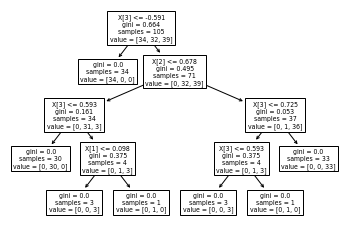

In [16]:
# Karar ağacının oluşturulması 


import matplotlib.pyplot as plt
decision_tree = tree.plot_tree(dtree)

In [24]:
#import graphviz 
#dot_data = tree.export_graphviz(dtree, out_file=None)
#graph = graphviz.Source(dot_data) 
#graph.render("iris")

[Text(133.92000000000002, 195.696, 'X[3] <= -0.591\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.678\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 0.593\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 0.098\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 0.725\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 0.593\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 

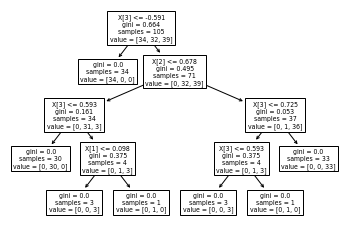

In [25]:
tree.plot_tree(dtree) 